In [23]:
import numpy as np
import pandas as pd
import featuretools as ft

print("Importing Data..."+'\n')
infos_df = pd.read_csv("data/infos.csv", sep='|') 
items_df = pd.read_csv("data/items.csv", sep='|')
orders_df = pd.read_csv("data/orders.csv", sep=',')

orders_df = orders_df.merge(items_df).merge(infos_df)

#orders_df["transactID"] = str(orders_df["transactID"])
#orders_df["itemID"] = str(orders_df["itemID"])
#orders_df["uniqueID"] = int(orders_df["transactID"].str.strip(to_strip="\n") + orders_df["itemID"].str.strip(to_strip="\n"))

#orders_df["uniqueID"] = orders_df["transactID"] * orders_df["itemID"]
orders_df["time"] = pd.to_datetime(orders_df["time"])
orders_df.reset_index(inplace=True)
#train = pd.get_dummies(train, columns=["weekDay"]) 

products_df = pd.DataFrame()
products_df = orders_df[["itemID","brand","manufacturer"]]
products_df.reset_index(inplace=True)

#orders = pd.DataFrame()
#orders = train[["itemID","order","salesPrice"]]

#infos = pd.DataFrame()
#infos = train[["itemID","simulationPrice","promotion"]]
print("Done.")

Importing Data...

Done.


In [24]:
orders_df.dtypes

index                              int64
time                      datetime64[ns]
transactID                         int64
itemID                             int64
order                              int64
salesPrice                       float64
brand                              int64
manufacturer                       int64
customerRating                   float64
category1                          int64
category2                          int64
category3                          int64
recommendedRetailPrice           float64
simulationPrice                  float64
promotion                         object
dtype: object

In [25]:
es = ft.EntitySet(id="data")

es = es.entity_from_dataframe(entity_id="transactions",
                              dataframe=orders_df,
                              index="index",
                              time_index="time",
                              variable_types={"itemID": ft.variable_types.Categorical, "category1": ft.variable_types.Categorical, "category2": ft.variable_types.Categorical, "category3": ft.variable_types.Categorical, "brand": ft.variable_types.Categorical, "manufacturer": ft.variable_types.Categorical})

es

Entityset: data
  Entities:
    transactions [Rows: 2181955, Columns: 15]
  Relationships:
    No relationships

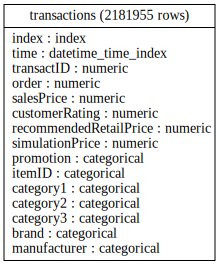

In [26]:
es.plot()

In [27]:
es["transactions"].variables

[<Variable: index (dtype = index)>,
 <Variable: time (dtype: datetime_time_index, format: None)>,
 <Variable: transactID (dtype = numeric)>,
 <Variable: order (dtype = numeric)>,
 <Variable: salesPrice (dtype = numeric)>,
 <Variable: customerRating (dtype = numeric)>,
 <Variable: recommendedRetailPrice (dtype = numeric)>,
 <Variable: simulationPrice (dtype = numeric)>,
 <Variable: promotion (dtype = categorical)>,
 <Variable: itemID (dtype = categorical)>,
 <Variable: category1 (dtype = categorical)>,
 <Variable: category2 (dtype = categorical)>,
 <Variable: category3 (dtype = categorical)>,
 <Variable: brand (dtype = categorical)>,
 <Variable: manufacturer (dtype = categorical)>]

In [28]:
es = es.entity_from_dataframe(entity_id= "products",
                              dataframe= products_df,
                              index= "index")

es

Entityset: data
  Entities:
    transactions [Rows: 2181955, Columns: 15]
    products [Rows: 2181955, Columns: 4]
  Relationships:
    No relationships

In [32]:
new_relationship = ft.Relationship(es["products"]["index"],
                                   es["transactions"]["index"])

es = es.add_relationship(new_relationship)
es

Entityset: data
  Entities:
    transactions [Rows: 2181955, Columns: 15]
    products [Rows: 2181955, Columns: 4]
  Relationships:
    transactions.index -> products.index

In [34]:
es = es.normalize_entity(base_entity_id="transactions",
                         new_entity_id="sessions",
                         index="transactID",
                         make_time_index="time",
                         additional_variables=["time", "order", "salesPrice"])

es

ValueError: Not moving time as it is the base time index variable. Perhaps, move the variable to the copy_variables.